#                                   Movie Recommendation System

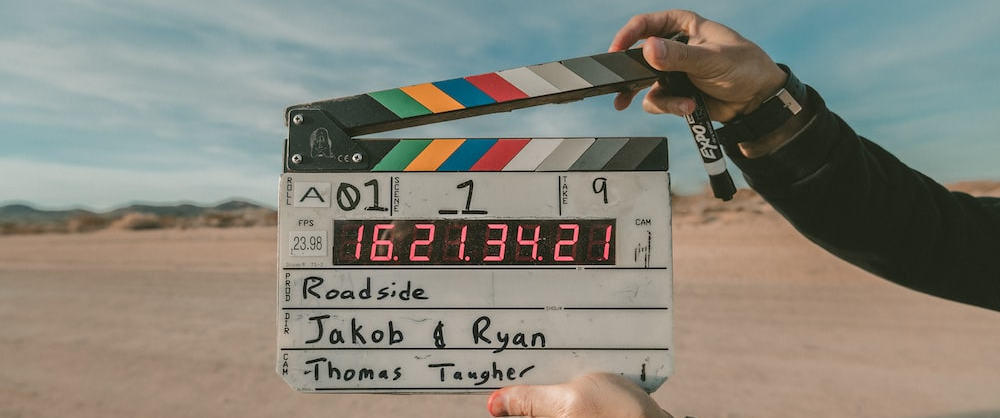

# Step 1: Introduction

#####  Movie Recommendation Systems have become increasingly vital in today's vast entertainment landscape. With a plethora of films available, these systems offer personalized suggestions, saving users from the overwhelming task of manual exploration. Employing seven distinct approaches, including average score, popularity, weighted score, storyline and overview analysis, genre-based recommendations, and collaborative filtering, these systems cater to diverse preferences. By leveraging these approaches, users can discover films based on their individual tastes, leading to enhanced cinematic experiences and the joy of finding hidden gems that resonate with their unique sensibilities. I have built this model based on K - Nearest Neighbour Algorithm, Cosine Similarity and many other tools.

Datasets: I have used the datasets from the MovieLens website.

# Step 2: Data Collection

### Importing necssary libraries and packages

In [114]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import ast 
import json
from collections.abc import Iterable

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import PrecisionRecallDisplay, mean_squared_error, precision_recall_fscore_support, precision_recall_curve
from sklearn.pipeline import Pipeline

from wordcloud import WordCloud

from surprise import SVD, Reader, Dataset 
from surprise.model_selection import cross_validate, train_test_split, GridSearchCV
from surprise import KNNWithMeans
from surprise import accuracy

from nltk import PorterStemmer

import warnings
warnings.filterwarnings('ignore', category=UserWarning, module='IPython')

In [115]:
movies = pd.read_csv("C:\\Users\\kabir\\OneDrive\\Desktop\\movies.csv")

In [116]:
credits= pd.read_csv("C:\\Users\\kabir\\OneDrive\\Desktop\\credits.csv")

# Step 3: Data Wrangling

### In this step, I have extracted the necessary information from the original columns. Moreover, the null values are also been taken care of.  

In [117]:
movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [118]:
movies = movies.rename(columns={'id': 'movie_id'})

In [119]:
credits.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [120]:
movies.describe()

,budget,movie_id,popularity,revenue,runtime,vote_average,vote_count
count,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000
mean,2.904504e+07,57165.484281,21.492301,8.226064e+07,106.875859,6.092172,690.217989
std,4.072239e+07,88694.614033,31.816650,1.628571e+08,22.611935,1.194612,1234.585891
min,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,7.900000e+05,9014.500000,4.668070,0.000000e+00,94.000000,5.600000,54.000000
50%,1.500000e+07,14629.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000
75%,4.000000e+07,58610.500000,28.313505,9.291719e+07,118.000000,6.800000,737.000000
max,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


In [121]:
credits.describe()

,movie_id
count,4803.000000
mean,57165.484281
std,88694.614033
min,5.000000
25%,9014.500000
50%,14629.000000
75%,58610.500000
max,459488.000000


In [122]:
movies.drop('title', axis=1, inplace= True)

In [123]:
credits.columns = ['movie_id','title','cast','crew']

In [124]:
movie_credits = pd.merge(credits, movies, on = 'movie_id')

In [125]:
movie_credits.head()

,movie_id,title,cast,crew,budget,genres,homepage,keywords,original_language,original_title,...,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,vote_average,vote_count
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,...,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,7.2,11800
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,...,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",6.9,4500
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,...,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,6.3,4466
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...",250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,...,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,7.6,9106
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...",260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,...,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",6.1,2124


In [126]:
movie_credits.isnull().any()

movie_id                False
title                   False
cast                    False
crew                    False
budget                  False
genres                  False
homepage                 True
keywords                False
original_language       False
original_title          False
overview                 True
popularity              False
production_companies    False
production_countries    False
release_date             True
revenue                 False
runtime                  True
spoken_languages        False
status                  False
tagline                  True
vote_average            False
vote_count              False
dtype: bool

In [127]:
movie_credits.duplicated().any()

False

In [128]:
movie_credits['runtime'].isnull().sum()

2

In [129]:
movie_credits = movie_credits[movie_credits['runtime'] != 0]

In [130]:
movie_credits = movie_credits.dropna(subset=['runtime'])

In [131]:
movie_credits['release_date'].isnull().sum()

0

In [132]:
movie_credits = movie_credits[movie_credits['release_date'] != 0]

In [133]:
movie_credits['overview'].isnull().sum()

1

In [134]:
movie_credits = movie_credits.dropna(subset=['overview'])

In [135]:
movie_credits = movie_credits[movie_credits['overview'] != 0]

In [136]:
movie_credits.shape

(4765, 22)

In [137]:
movie_credits.isnull().any()

movie_id                False
title                   False
cast                    False
crew                    False
budget                  False
genres                  False
homepage                 True
keywords                False
original_language       False
original_title          False
overview                False
popularity              False
production_companies    False
production_countries    False
release_date            False
revenue                 False
runtime                 False
spoken_languages        False
status                  False
tagline                  True
vote_average            False
vote_count              False
dtype: bool

In [138]:
movie_credits.head()

,movie_id,title,cast,crew,budget,genres,homepage,keywords,original_language,original_title,...,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,vote_average,vote_count
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,...,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,7.2,11800
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,...,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",6.9,4500
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,...,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,6.3,4466
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...",250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,...,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,7.6,9106
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...",260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,...,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",6.1,2124


In [139]:
movie_credits.iloc[0].genres

'[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]'

In [140]:
movie_credits.iloc[0].keywords

'[{"id": 1463, "name": "culture clash"}, {"id": 2964, "name": "future"}, {"id": 3386, "name": "space war"}, {"id": 3388, "name": "space colony"}, {"id": 3679, "name": "society"}, {"id": 3801, "name": "space travel"}, {"id": 9685, "name": "futuristic"}, {"id": 9840, "name": "romance"}, {"id": 9882, "name": "space"}, {"id": 9951, "name": "alien"}, {"id": 10148, "name": "tribe"}, {"id": 10158, "name": "alien planet"}, {"id": 10987, "name": "cgi"}, {"id": 11399, "name": "marine"}, {"id": 13065, "name": "soldier"}, {"id": 14643, "name": "battle"}, {"id": 14720, "name": "love affair"}, {"id": 165431, "name": "anti war"}, {"id": 193554, "name": "power relations"}, {"id": 206690, "name": "mind and soul"}, {"id": 209714, "name": "3d"}]'

In [141]:
movie_credits['genres'] =movie_credits['genres'].apply(ast.literal_eval)
    # Extract the values of the "name" key from each dictionary
movie_credits['new_genre'] = movie_credits['genres'].apply(lambda x: [genre['name'] for genre in x])

    # Drop the original "genres" column
movie_credits.drop('genres', axis=1, inplace=True)

In [142]:
movie_credits['new_genre'] = movie_credits['new_genre'].apply(lambda x: '[' + ', '.join(x) + ']')

In [143]:
movie_credits['new_genre'] 

0       [Action, Adventure, Fantasy, Science Fiction]
1                        [Adventure, Fantasy, Action]
2                          [Action, Adventure, Crime]
3                    [Action, Crime, Drama, Thriller]
4                [Action, Adventure, Science Fiction]
                            ...                      
4798                        [Action, Crime, Thriller]
4799                                [Comedy, Romance]
4800               [Comedy, Drama, Romance, TV Movie]
4801                                               []
4802                                    [Documentary]
Name: new_genre, Length: 4765, dtype: object

In [144]:
# Convert the string representation of dictionaries to actual dictionaries
movie_credits['keywords'] = movie_credits['keywords'].apply(json.loads)

# Extract the 'name' values from the dictionaries and create a new column
movie_credits['new_keywords'] = movie_credits['keywords'].apply(lambda x: [keyword['name'] for keyword in x])

# Convert the "new_keywords" column to a string representation with square brackets
movie_credits['new_keywords'] = movie_credits['new_keywords'].apply(lambda x: '[' + ', '.join(x) + ']')

# Drop the original "keywords" column
movie_credits.drop('keywords', axis=1, inplace=True)

In [145]:
movie_credits['new_keywords']

0       [culture clash, future, space war, space colon...
1       [ocean, drug abuse, exotic island, east india ...
2       [spy, based on novel, secret agent, sequel, mi...
3       [dc comics, crime fighter, terrorist, secret i...
4       [based on novel, mars, medallion, space travel...
                              ...                        
4798    [united states–mexico barrier, legs, arms, pap...
4799                                                   []
4800    [date, love at first sight, narration, investi...
4801                                                   []
4802            [obsession, camcorder, crush, dream girl]
Name: new_keywords, Length: 4765, dtype: object

In [146]:
movie_credits['cast'] 

0       [{"cast_id": 242, "character": "Jake Sully", "...
1       [{"cast_id": 4, "character": "Captain Jack Spa...
2       [{"cast_id": 1, "character": "James Bond", "cr...
3       [{"cast_id": 2, "character": "Bruce Wayne / Ba...
4       [{"cast_id": 5, "character": "John Carter", "c...
                              ...                        
4798    [{"cast_id": 1, "character": "El Mariachi", "c...
4799    [{"cast_id": 1, "character": "Buzzy", "credit_...
4800    [{"cast_id": 8, "character": "Oliver O\u2019To...
4801    [{"cast_id": 3, "character": "Sam", "credit_id...
4802    [{"cast_id": 3, "character": "Herself", "credi...
Name: cast, Length: 4765, dtype: object

In [147]:
movie_credits['cast'].iloc[0]

'[{"cast_id": 242, "character": "Jake Sully", "credit_id": "5602a8a7c3a3685532001c9a", "gender": 2, "id": 65731, "name": "Sam Worthington", "order": 0}, {"cast_id": 3, "character": "Neytiri", "credit_id": "52fe48009251416c750ac9cb", "gender": 1, "id": 8691, "name": "Zoe Saldana", "order": 1}, {"cast_id": 25, "character": "Dr. Grace Augustine", "credit_id": "52fe48009251416c750aca39", "gender": 1, "id": 10205, "name": "Sigourney Weaver", "order": 2}, {"cast_id": 4, "character": "Col. Quaritch", "credit_id": "52fe48009251416c750ac9cf", "gender": 2, "id": 32747, "name": "Stephen Lang", "order": 3}, {"cast_id": 5, "character": "Trudy Chacon", "credit_id": "52fe48009251416c750ac9d3", "gender": 1, "id": 17647, "name": "Michelle Rodriguez", "order": 4}, {"cast_id": 8, "character": "Selfridge", "credit_id": "52fe48009251416c750ac9e1", "gender": 2, "id": 1771, "name": "Giovanni Ribisi", "order": 5}, {"cast_id": 7, "character": "Norm Spellman", "credit_id": "52fe48009251416c750ac9dd", "gender": 

In [148]:
movie_credits['crew'].iloc[0]

'[{"credit_id": "52fe48009251416c750aca23", "department": "Editing", "gender": 0, "id": 1721, "job": "Editor", "name": "Stephen E. Rivkin"}, {"credit_id": "539c47ecc3a36810e3001f87", "department": "Art", "gender": 2, "id": 496, "job": "Production Design", "name": "Rick Carter"}, {"credit_id": "54491c89c3a3680fb4001cf7", "department": "Sound", "gender": 0, "id": 900, "job": "Sound Designer", "name": "Christopher Boyes"}, {"credit_id": "54491cb70e0a267480001bd0", "department": "Sound", "gender": 0, "id": 900, "job": "Supervising Sound Editor", "name": "Christopher Boyes"}, {"credit_id": "539c4a4cc3a36810c9002101", "department": "Production", "gender": 1, "id": 1262, "job": "Casting", "name": "Mali Finn"}, {"credit_id": "5544ee3b925141499f0008fc", "department": "Sound", "gender": 2, "id": 1729, "job": "Original Music Composer", "name": "James Horner"}, {"credit_id": "52fe48009251416c750ac9c3", "department": "Directing", "gender": 2, "id": 2710, "job": "Director", "name": "James Cameron"},

In [149]:
movie_credits['crew'] = movie_credits['crew'].apply(lambda x: json.loads(x))

# Extract the "name" values from the "crew" column
movie_credits['new_crew'] = movie_credits['crew'].apply(lambda x: [crew_member['name'] for crew_member in x])

# Convert the "new_crew" column to a string representation with square brackets
movie_credits['new_crew'] = movie_credits['new_crew'].apply(lambda x: '[' + ', '.join(x) + ']')

# Drop the original "crew" column
movie_credits.drop('crew', axis=1, inplace=True)

In [150]:
movie_credits['cast'] = movie_credits['cast'].apply(lambda x: json.loads(x))

# Extract the "character" values from the "cast" column
movie_credits['new_cast'] = movie_credits['cast'].apply(lambda x: [cast_member['character'] for cast_member in x])

# Convert the "new_cast" column to a string representation with square brackets
movie_credits['new_cast'] = movie_credits['new_cast'].apply(lambda x: '[' + ', '.join(x) + ']')

# Drop the original "cast" column
movie_credits.drop('cast', axis=1, inplace=True)

In [151]:
movie_credits['production_countries'].iloc[0]

'[{"iso_3166_1": "US", "name": "United States of America"}, {"iso_3166_1": "GB", "name": "United Kingdom"}]'

In [152]:
movie_credits['production_countries'] = movie_credits['production_countries'].apply(lambda x: json.loads(x))

# Extract the "name" values from the "production_countries" column
movie_credits['new_production_countries'] = movie_credits['production_countries'].apply(lambda x: [country['name'] for country in x])

# Convert the "new_production_countries" column to a string representation with square brackets
movie_credits['new_production_countries'] = movie_credits['new_production_countries'].apply(lambda x: '[' + ', '.join(x) + ']')

# Drop the original "production_countries" column
movie_credits.drop('production_countries', axis=1, inplace=True)

In [153]:
movie_credits['production_companies'].iloc[0]

'[{"name": "Ingenious Film Partners", "id": 289}, {"name": "Twentieth Century Fox Film Corporation", "id": 306}, {"name": "Dune Entertainment", "id": 444}, {"name": "Lightstorm Entertainment", "id": 574}]'

In [154]:
movie_credits['production_companies'] = movie_credits['production_companies'].apply(lambda x: json.loads(x))

# Extract the "name" values from the "production_companies" column
movie_credits['new_production_companies'] = movie_credits['production_companies'].apply(lambda x: [company['name'] for company in x])

# Convert the "new_production_companies" column to a string representation with square brackets
movie_credits['new_production_companies'] = movie_credits['new_production_companies'].apply(lambda x: '[' + ', '.join(x) + ']')

# Drop the original "production_companies" column
movie_credits.drop('production_companies', axis=1, inplace=True)

In [155]:
movie_credits.head()

,movie_id,title,budget,homepage,original_language,original_title,overview,popularity,release_date,revenue,...,status,tagline,vote_average,vote_count,new_genre,new_keywords,new_crew,new_cast,new_production_countries,new_production_companies
0,19995,Avatar,237000000,http://www.avatarmovie.com/,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,2009-12-10,2787965087,...,Released,Enter the World of Pandora.,7.2,11800,"[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[Stephen E. Rivkin, Rick Carter, Christopher B...","[Jake Sully, Neytiri, Dr. Grace Augustine, Col...","[United States of America, United Kingdom]","[Ingenious Film Partners, Twentieth Century Fo..."
1,285,Pirates of the Caribbean: At World's End,300000000,http://disney.go.com/disneypictures/pirates/,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,2007-05-19,961000000,...,Released,"At the end of the world, the adventure begins.",6.9,4500,"[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","[Dariusz Wolski, Gore Verbinski, Jerry Bruckhe...","[Captain Jack Sparrow, Will Turner, Elizabeth ...",[United States of America],"[Walt Disney Pictures, Jerry Bruckheimer Films..."
2,206647,Spectre,245000000,http://www.sonypictures.com/movies/spectre/,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,2015-10-26,880674609,...,Released,A Plan No One Escapes,6.3,4466,"[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...","[Thomas Newman, Sam Mendes, Anna Pinnock, John...","[James Bond, Blofeld, Madeleine, M, Lucia, Q, ...","[United Kingdom, United States of America]","[Columbia Pictures, Danjaq, B24]"
3,49026,The Dark Knight Rises,250000000,http://www.thedarkknightrises.com/,en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,2012-07-16,1084939099,...,Released,The Legend Ends,7.6,9106,"[Action, Crime, Drama, Thriller]","[dc comics, crime fighter, terrorist, secret i...","[Hans Zimmer, Charles Roven, Christopher Nolan...","[Bruce Wayne / Batman, Alfred Pennyworth, Jame...",[United States of America],"[Legendary Pictures, Warner Bros., DC Entertai..."
4,49529,John Carter,260000000,http://movies.disney.com/john-carter,en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,2012-03-07,284139100,...,Released,"Lost in our world, found in another.",6.1,2124,"[Action, Adventure, Science Fiction]","[based on novel, mars, medallion, space travel...","[Andrew Stanton, Andrew Stanton, John Lasseter...","[John Carter, Dejah Thoris, Sola, Tars Tarkas,...",[United States of America],[Walt Disney Pictures]


In [156]:
movie_credits['overview'] = movie_credits['overview'].apply(lambda x: x.split() if isinstance(x, str) else np.nan)

In [157]:
movie_credits.head()

,movie_id,title,budget,homepage,original_language,original_title,overview,popularity,release_date,revenue,...,status,tagline,vote_average,vote_count,new_genre,new_keywords,new_crew,new_cast,new_production_countries,new_production_companies
0,19995,Avatar,237000000,http://www.avatarmovie.com/,en,Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin...",150.437577,2009-12-10,2787965087,...,Released,Enter the World of Pandora.,7.2,11800,"[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[Stephen E. Rivkin, Rick Carter, Christopher B...","[Jake Sully, Neytiri, Dr. Grace Augustine, Col...","[United States of America, United Kingdom]","[Ingenious Film Partners, Twentieth Century Fo..."
1,285,Pirates of the Caribbean: At World's End,300000000,http://disney.go.com/disneypictures/pirates/,en,Pirates of the Caribbean: At World's End,"[Captain, Barbossa,, long, believed, to, be, d...",139.082615,2007-05-19,961000000,...,Released,"At the end of the world, the adventure begins.",6.9,4500,"[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","[Dariusz Wolski, Gore Verbinski, Jerry Bruckhe...","[Captain Jack Sparrow, Will Turner, Elizabeth ...",[United States of America],"[Walt Disney Pictures, Jerry Bruckheimer Films..."
2,206647,Spectre,245000000,http://www.sonypictures.com/movies/spectre/,en,Spectre,"[A, cryptic, message, from, Bond’s, past, send...",107.376788,2015-10-26,880674609,...,Released,A Plan No One Escapes,6.3,4466,"[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...","[Thomas Newman, Sam Mendes, Anna Pinnock, John...","[James Bond, Blofeld, Madeleine, M, Lucia, Q, ...","[United Kingdom, United States of America]","[Columbia Pictures, Danjaq, B24]"
3,49026,The Dark Knight Rises,250000000,http://www.thedarkknightrises.com/,en,The Dark Knight Rises,"[Following, the, death, of, District, Attorney...",112.312950,2012-07-16,1084939099,...,Released,The Legend Ends,7.6,9106,"[Action, Crime, Drama, Thriller]","[dc comics, crime fighter, terrorist, secret i...","[Hans Zimmer, Charles Roven, Christopher Nolan...","[Bruce Wayne / Batman, Alfred Pennyworth, Jame...",[United States of America],"[Legendary Pictures, Warner Bros., DC Entertai..."
4,49529,John Carter,260000000,http://movies.disney.com/john-carter,en,John Carter,"[John, Carter, is, a, war-weary,, former, mili...",43.926995,2012-03-07,284139100,...,Released,"Lost in our world, found in another.",6.1,2124,"[Action, Adventure, Science Fiction]","[based on novel, mars, medallion, space travel...","[Andrew Stanton, Andrew Stanton, John Lasseter...","[John Carter, Dejah Thoris, Sola, Tars Tarkas,...",[United States of America],[Walt Disney Pictures]


In [158]:
movie_credits.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4765 entries, 0 to 4802
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   movie_id                  4765 non-null   int64  
 1   title                     4765 non-null   object 
 2   budget                    4765 non-null   int64  
 3   homepage                  1707 non-null   object 
 4   original_language         4765 non-null   object 
 5   original_title            4765 non-null   object 
 6   overview                  4765 non-null   object 
 7   popularity                4765 non-null   float64
 8   release_date              4765 non-null   object 
 9   revenue                   4765 non-null   int64  
 10  runtime                   4765 non-null   float64
 11  spoken_languages          4765 non-null   object 
 12  status                    4765 non-null   object 
 13  tagline                   3952 non-null   object 
 14  vote_average 

In [159]:
movie_credits['new_crew']

0       [Stephen E. Rivkin, Rick Carter, Christopher B...
1       [Dariusz Wolski, Gore Verbinski, Jerry Bruckhe...
2       [Thomas Newman, Sam Mendes, Anna Pinnock, John...
3       [Hans Zimmer, Charles Roven, Christopher Nolan...
4       [Andrew Stanton, Andrew Stanton, John Lasseter...
                              ...                        
4798    [Robert Rodriguez, Robert Rodriguez, Robert Ro...
4799    [Edward Burns, Edward Burns, Edward Burns, Wil...
4800    [Carla Hetland, Harvey Kahn, Adam Sliwinski, M...
4801                           [Daniel Hsia, Daniel Hsia]
4802    [Clark Peterson, Andrew Reimer, Brian Herzling...
Name: new_crew, Length: 4765, dtype: object

In [160]:


# Create a new column 'merged_column' by merging the list columns
movie_credits['tags'] = movie_credits[['overview', 'new_cast','new_keywords' ,'new_genre', 'new_crew']].apply(lambda x: [item for sublist in x.dropna() for item in sublist], axis=1)

# # Drop the original four columns
# movie_credits.drop(['overview', 'new_cast', 'new_genre', 'new_crew'], axis=1, inplace=True)


In [161]:
movie_credits['tags']

0       [In, the, 22nd, century,, a, paraplegic, Marin...
1       [Captain, Barbossa,, long, believed, to, be, d...
2       [A, cryptic, message, from, Bond’s, past, send...
3       [Following, the, death, of, District, Attorney...
4       [John, Carter, is, a, war-weary,, former, mili...
                              ...                        
4798    [El, Mariachi, just, wants, to, play, his, gui...
4799    [A, newlywed, couple's, honeymoon, is, upended...
4800    ["Signed,, Sealed,, Delivered", introduces, a,...
4801    [When, ambitious, New, York, attorney, Sam, is...
4802    [Ever, since, the, second, grade, when, he, fi...
Name: tags, Length: 4765, dtype: object

In [162]:
movie_credits.rename(columns= {'new_cast':'cast'}, inplace=True)
movie_credits.rename(columns= {'new_keywords':'keywords'}, inplace=True)
movie_credits.rename(columns= {'new_genre':'genre'}, inplace=True)
movie_credits.rename(columns= {'new_crew':'crew'}, inplace=True)

In [163]:
movie_credits.head()

,movie_id,title,budget,homepage,original_language,original_title,overview,popularity,release_date,revenue,...,tagline,vote_average,vote_count,genre,keywords,crew,cast,new_production_countries,new_production_companies,tags
0,19995,Avatar,237000000,http://www.avatarmovie.com/,en,Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin...",150.437577,2009-12-10,2787965087,...,Enter the World of Pandora.,7.2,11800,"[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[Stephen E. Rivkin, Rick Carter, Christopher B...","[Jake Sully, Neytiri, Dr. Grace Augustine, Col...","[United States of America, United Kingdom]","[Ingenious Film Partners, Twentieth Century Fo...","[In, the, 22nd, century,, a, paraplegic, Marin..."
1,285,Pirates of the Caribbean: At World's End,300000000,http://disney.go.com/disneypictures/pirates/,en,Pirates of the Caribbean: At World's End,"[Captain, Barbossa,, long, believed, to, be, d...",139.082615,2007-05-19,961000000,...,"At the end of the world, the adventure begins.",6.9,4500,"[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","[Dariusz Wolski, Gore Verbinski, Jerry Bruckhe...","[Captain Jack Sparrow, Will Turner, Elizabeth ...",[United States of America],"[Walt Disney Pictures, Jerry Bruckheimer Films...","[Captain, Barbossa,, long, believed, to, be, d..."
2,206647,Spectre,245000000,http://www.sonypictures.com/movies/spectre/,en,Spectre,"[A, cryptic, message, from, Bond’s, past, send...",107.376788,2015-10-26,880674609,...,A Plan No One Escapes,6.3,4466,"[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...","[Thomas Newman, Sam Mendes, Anna Pinnock, John...","[James Bond, Blofeld, Madeleine, M, Lucia, Q, ...","[United Kingdom, United States of America]","[Columbia Pictures, Danjaq, B24]","[A, cryptic, message, from, Bond’s, past, send..."
3,49026,The Dark Knight Rises,250000000,http://www.thedarkknightrises.com/,en,The Dark Knight Rises,"[Following, the, death, of, District, Attorney...",112.312950,2012-07-16,1084939099,...,The Legend Ends,7.6,9106,"[Action, Crime, Drama, Thriller]","[dc comics, crime fighter, terrorist, secret i...","[Hans Zimmer, Charles Roven, Christopher Nolan...","[Bruce Wayne / Batman, Alfred Pennyworth, Jame...",[United States of America],"[Legendary Pictures, Warner Bros., DC Entertai...","[Following, the, death, of, District, Attorney..."
4,49529,John Carter,260000000,http://movies.disney.com/john-carter,en,John Carter,"[John, Carter, is, a, war-weary,, former, mili...",43.926995,2012-03-07,284139100,...,"Lost in our world, found in another.",6.1,2124,"[Action, Adventure, Science Fiction]","[based on novel, mars, medallion, space travel...","[Andrew Stanton, Andrew Stanton, John Lasseter...","[John Carter, Dejah Thoris, Sola, Tars Tarkas,...",[United States of America],[Walt Disney Pictures],"[John, Carter, is, a, war-weary,, former, mili..."


In [164]:
vote_count_uni = movie_credits['vote_count'].describe()
vote_count_uni

count     4765.000000
mean       695.695278
std       1237.968977
min          0.000000
25%         56.000000
50%        240.000000
75%        742.000000
max      13752.000000
Name: vote_count, dtype: float64

# Step 4: Exploratory Data Analysis

### 1) Univariate Analysis: Creative visualisations has been shown including Score Distribution, Popularity Distribution, Production Companies, Genres, and other.
### 2) Bivariate Analysis: Descriptive visualisations has been shown including Revenue vs Popularity, Revenue vs Runtime, and others.

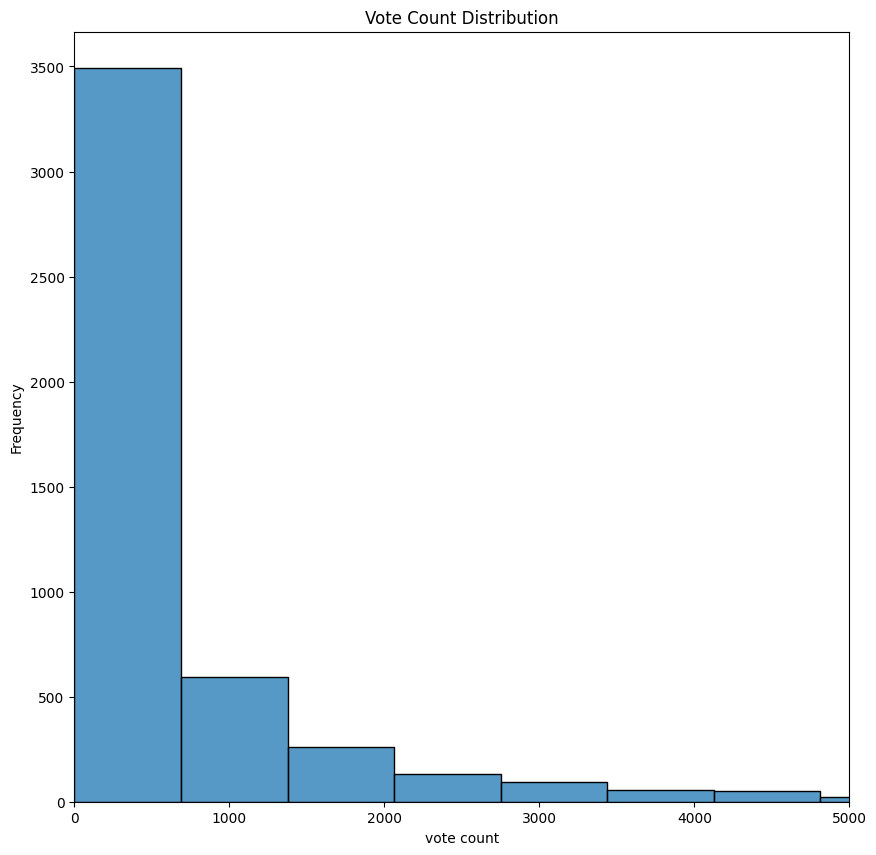

In [165]:
plt.figure(figsize=(10,10))
sns.histplot(movie_credits['vote_count'], kde=False, bins=20)
plt.xlabel("vote count")
plt.ylabel("Frequency")
plt.xlim(0,5000)

plt.title('Vote Count Distribution')

plt.show()

In [166]:
vote_avg_uni = movie_credits['vote_average'].describe()
vote_avg_uni

count    4765.000000
mean        6.113095
std         1.143964
min         0.000000
25%         5.600000
50%         6.200000
75%         6.800000
max        10.000000
Name: vote_average, dtype: float64

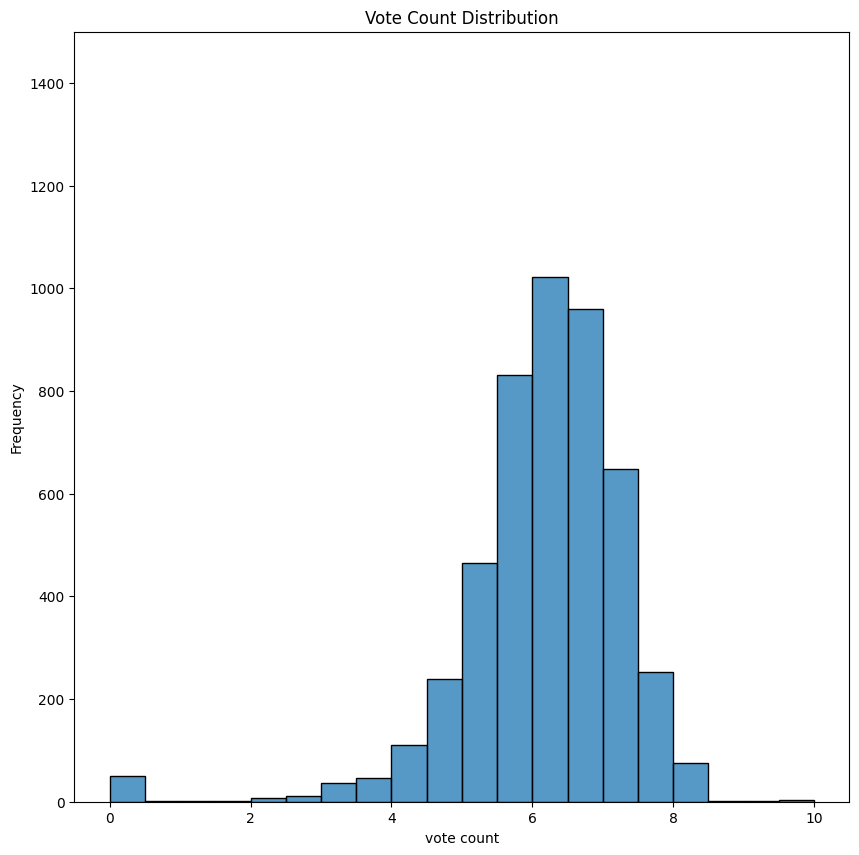

In [167]:
plt.figure(figsize=(10,10))
sns.histplot(movie_credits['vote_average'], kde=False, bins=20)
plt.xlabel("vote count")
plt.ylabel("Frequency")
plt.ylim(0,1500)

plt.title('Vote Count Distribution')

plt.show()

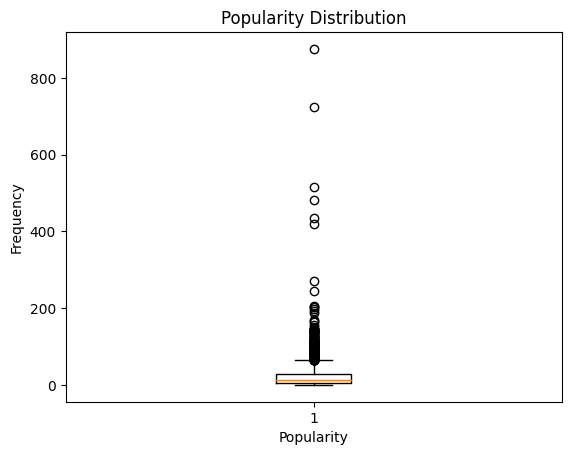

In [168]:
plt.boxplot(movie_credits['popularity'])
plt.ylabel('Frequency')
plt.xlabel('Popularity')
plt.title('Popularity Distribution')

plt.show()

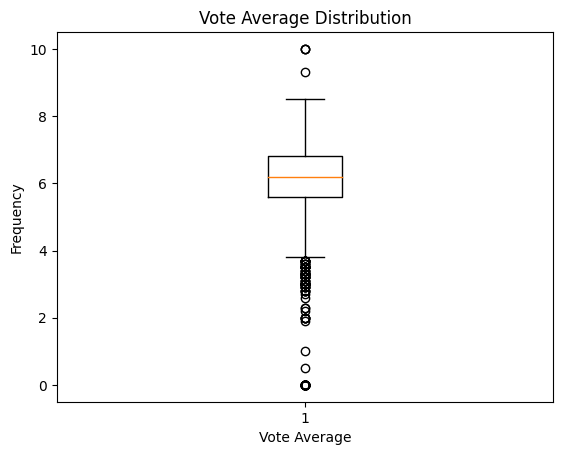

In [169]:
plt.boxplot(movie_credits['vote_average'])
plt.ylabel('Frequency')
plt.xlabel('Vote Average')
plt.title('Vote Average Distribution')

plt.show()

In [170]:
movie_credits['popularity'].nlargest(10)

546    875.581305
95     724.247784
788    514.569956
94     481.098624
127    434.278564
28     418.708552
199    271.972889
82     243.791743
200    206.227151
88     203.734590
Name: popularity, dtype: float64

In [171]:
movie_credits['popularity'].nsmallest(10)

3361    0.000372
4727    0.001117
4625    0.001389
4509    0.001586
4305    0.002386
4721    0.002388
4487    0.003142
4589    0.003352
4769    0.003582
4462    0.004922
Name: popularity, dtype: float64

In [172]:
lower_bound= 0
upper_bound= 200

movie_credits_filter = movie_credits[movie_credits['popularity'].between(lower_bound,upper_bound)]
movie_credits_filter.shape

(4754, 23)

In [173]:
lower_bound= 2
upper_bound= 8

movie_credits_filter = movie_credits[movie_credits['vote_average'].between(lower_bound,upper_bound)]
movie_credits_filter.shape

(4664, 23)

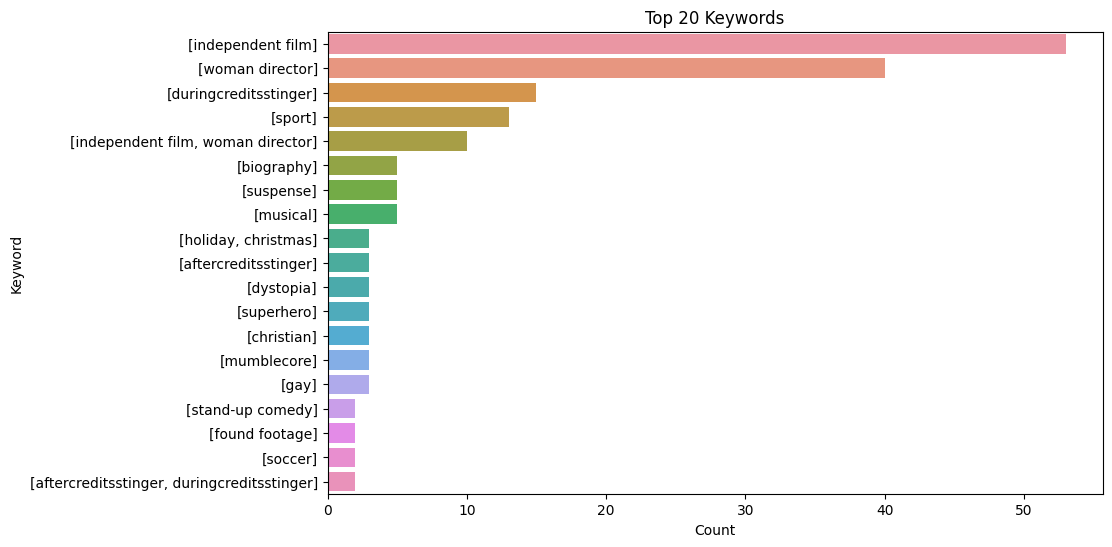

In [174]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get the top 20 keywords
top_keywords_1 = movie_credits['keywords'].value_counts().head(20)
top_keywords = top_keywords_1.iloc[1:20]

# Plot the bar graph
plt.figure(figsize=(10, 6))
sns.barplot(x=top_keywords, y=top_keywords.index, orient='h')
plt.xlabel('Count')
plt.ylabel('Keyword')
plt.title('Top 20 Keywords')
plt.show()


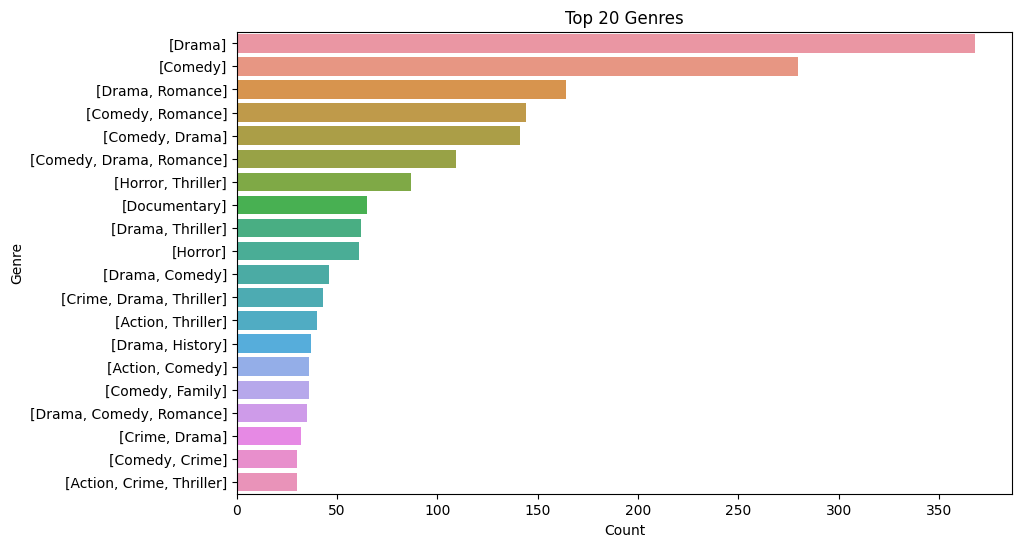

In [175]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get the top 20 genres
top_genres = movie_credits['genre'].value_counts().head(20)

# Plot the bar graph for genres
plt.figure(figsize=(10, 6))
sns.barplot(x=top_genres, y=top_genres.index, orient='h')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.title('Top 20 Genres')
plt.show()









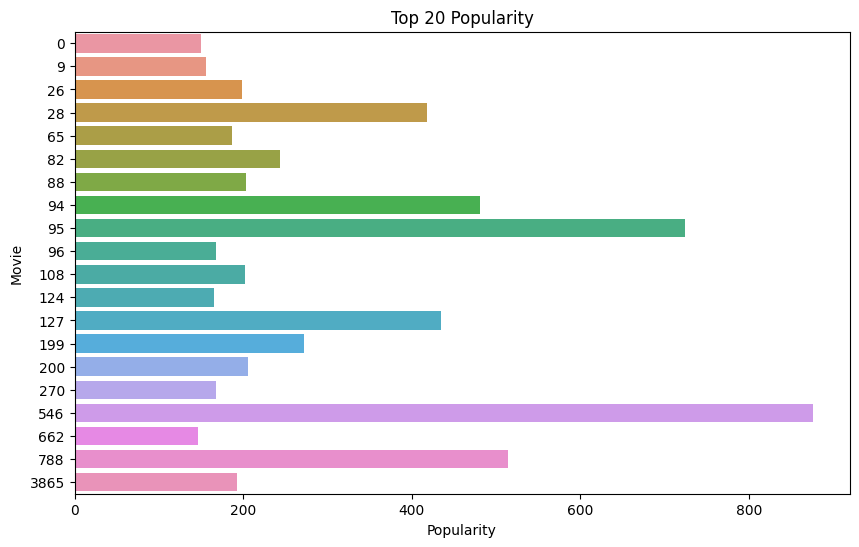

In [176]:

# Get the top 20 popularity values
top_popularity = movie_credits['popularity'].nlargest(20)

# Plot the bar graph for popularity
plt.figure(figsize=(10, 6))
sns.barplot(x=top_popularity, y=top_popularity.index, orient='h')
plt.xlabel('Popularity')
plt.ylabel('Movie')
plt.title('Top 20 Popularity')
plt.show()



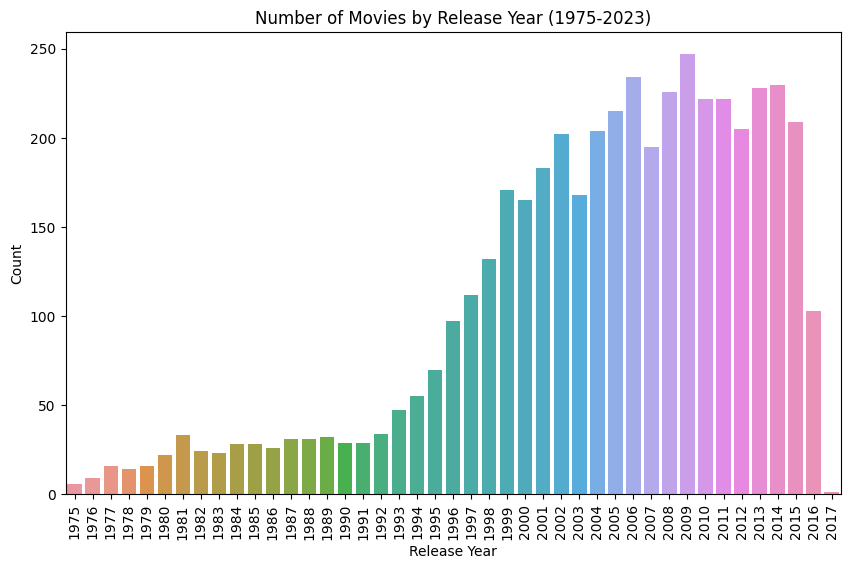

In [177]:
# Extract the release year from the 'release_date' column
movie_credits['release_year'] = pd.to_datetime(movie_credits['release_date']).dt.year

# Filter the movies by release year from 1975 to 2023
filtered_movies = movie_credits[(movie_credits['release_year'] >= 1975) & (movie_credits['release_year'] <= 2023)]

# Count the number of movies per release year
movies_by_year = filtered_movies['release_year'].value_counts().sort_index()

# Plot the bar graph for movies by release year
plt.figure(figsize=(10, 6))
sns.barplot(x=movies_by_year.index, y=movies_by_year.values, orient='v')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.title('Number of Movies by Release Year (1975-2023)')
plt.xticks(rotation=90)
plt.show()


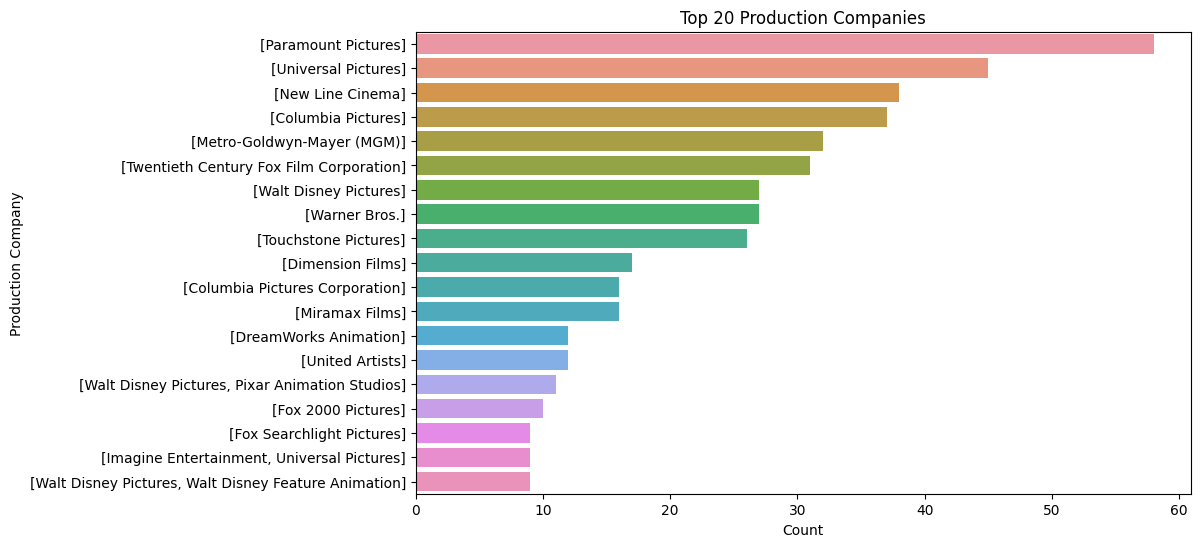

In [178]:
# Get the top 20 production companies
top_companies_1 = movie_credits['new_production_companies'].value_counts().head(20)
top_companies = top_companies_1.iloc[1:20]

# Plot the bar graph for production companies
plt.figure(figsize=(10, 6))
sns.barplot(x=top_companies, y=top_companies.index, orient='h')
plt.xlabel('Count')
plt.ylabel('Production Company')
plt.title('Top 20 Production Companies')
plt.show()

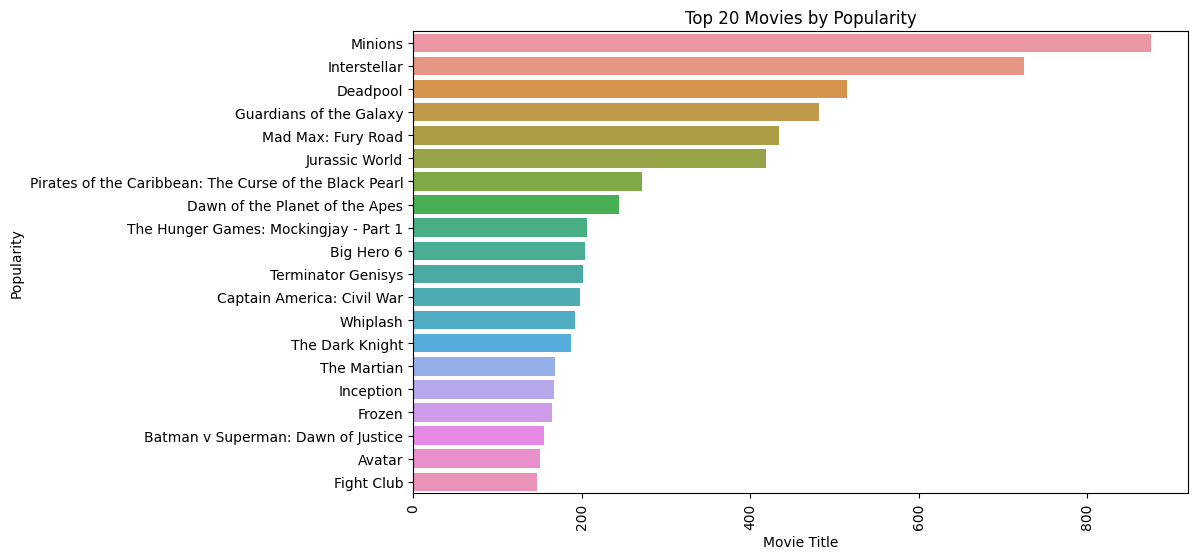

In [179]:
sorted_df = movie_credits.sort_values('popularity', ascending=False)

# Get the top 20 movies by popularity
top_movies = sorted_df.head(20)

# Plot the bar graph
plt.figure(figsize=(10, 6))
sns.barplot(y= top_movies['original_title'], x= top_movies['popularity'])
plt.xlabel('Movie Title')
plt.ylabel('Popularity')
plt.title('Top 20 Movies by Popularity')
plt.xticks(rotation=90)
plt.show()

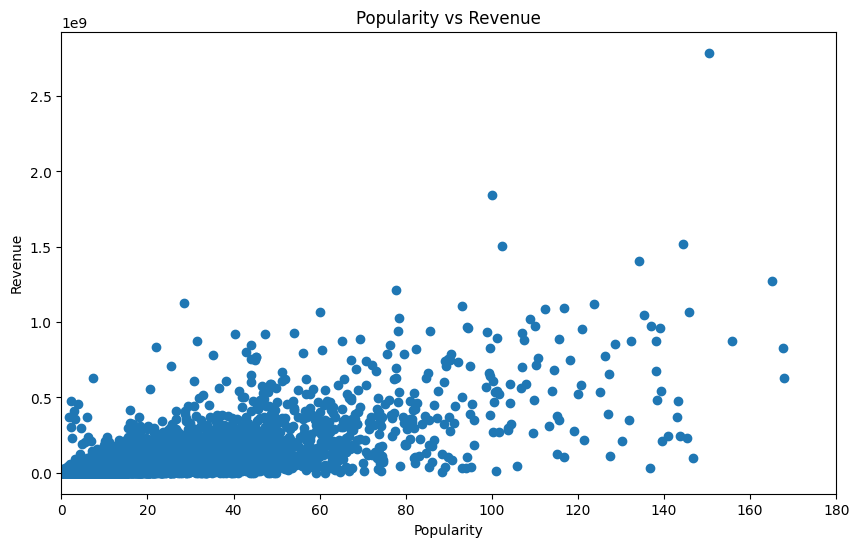

In [180]:
plt.figure(figsize=(10, 6))
# sns.barplot(x=movie_credits['popularity'], y=movie_credits['revenue'], orient='v')
plt.scatter(movie_credits['popularity'], movie_credits['revenue'])
plt.xlabel('Popularity')
plt.ylabel('Revenue')
plt.title('Popularity vs Revenue')
plt.xlim(0,180)
plt.show()





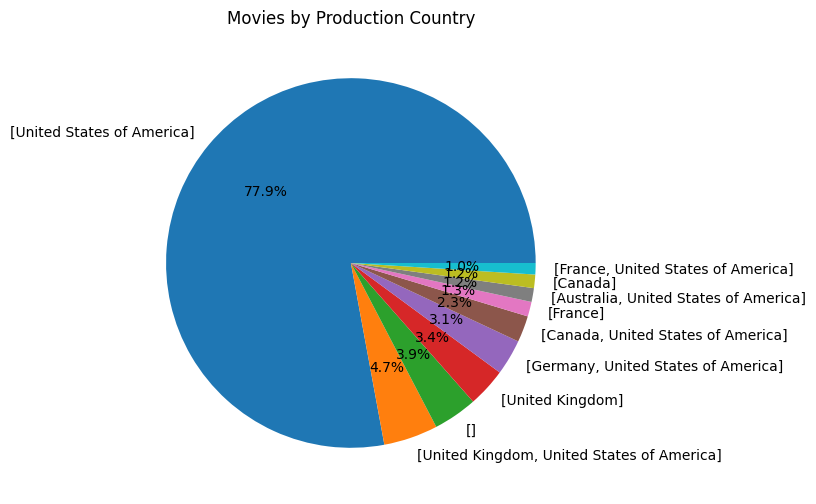

In [181]:
# Pie chart: Movies by production country
plt.figure(figsize=(10, 6))
production_country_counts = movie_credits['new_production_countries'].value_counts().head(10)
plt.pie(production_country_counts, labels=production_country_counts.index, autopct='%1.1f%%')
plt.title('Movies by Production Country')
plt.show()


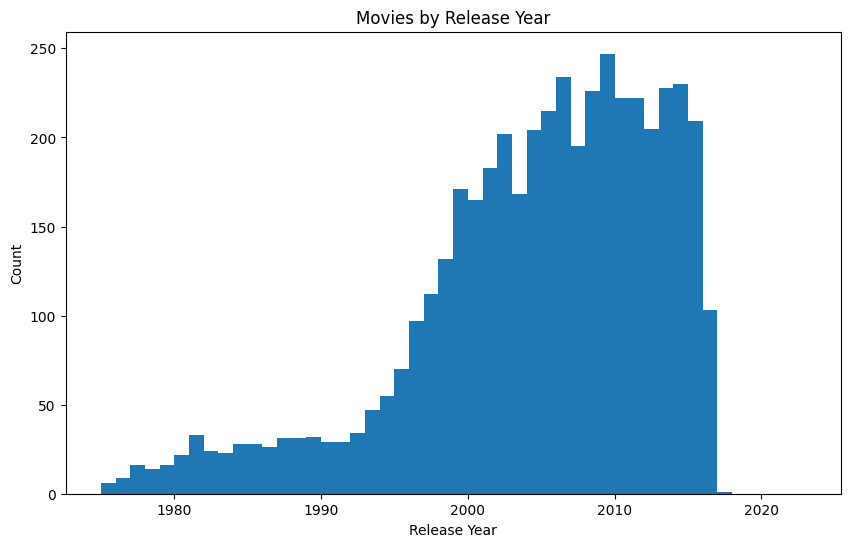

In [182]:
# Histogram: Movies by release year
plt.figure(figsize=(10, 6))
plt.hist(movie_credits['release_year'], bins=range(1975, 2024, 1))
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.title('Movies by Release Year')
plt.show()


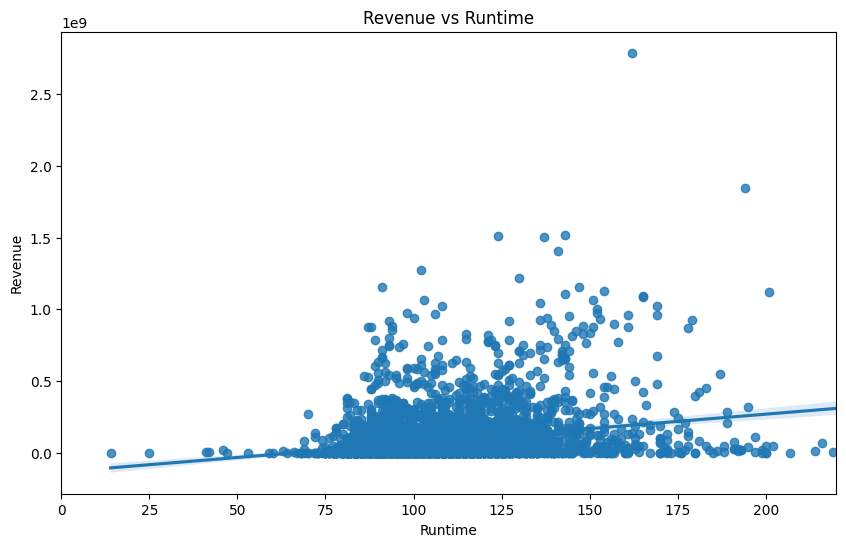

In [183]:
# Regression plot: Revenue vs Runtime
plt.figure(figsize=(10, 6))
sns.regplot(x=movie_credits['runtime'], y=movie_credits['revenue'])
plt.xlabel('Runtime')
plt.ylabel('Revenue')
plt.title('Revenue vs Runtime')
plt.xlim(0,220)
plt.show()

# Step 5: Modeling using Machine Learning Algorithms

### Modelling based on different features :

#### A) By Average Score
#### B) By Popularity
#### C) By weighted Score
#### D) By storyline and Overview
#### E) By Genre
#### F) By Collaborative Filtering

## A) By Average Score

In [184]:
movie_credits['vote_average'].mean()

6.113095487932844

In [185]:
movie_credits['vote_average'].quantile(q=0.9)

7.3

In [186]:
# Filter and put them in a new dataframe
new_df_filtered=movie_credits[movie_credits['vote_count']>movie_credits['vote_count'].quantile(q=0.9)]

In [187]:
new_df_filtered.shape

(477, 24)

In [188]:
def movie_score(x):
    vc = x['vote_count']
    mv = movie_credits['vote_count'].quantile(q=0.9)
    ra = x['vote_average']
    vam = movie_credits['vote_average'].mean()
    return ((ra*vc)/(vc+mv)) + ((vam*mv)/(vc+mv))
    
    

In [189]:
new_df_filtered.loc[:, 'score'] = new_df_filtered.apply(movie_score, axis=1) 

C:\Users\kabir\AppData\Local\Temp\ipykernel_17888\4210382413.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df_filtered.loc[:, 'score'] = new_df_filtered.apply(movie_score, axis=1)


In [190]:
new_score = new_df_filtered.sort_values(by =  'score', ascending = False).head(10)
new_score[['title','vote_count', 'vote_average', 'popularity', 'score']]

,title,vote_count,vote_average,popularity,score
1881,The Shawshank Redemption,8205,8.5,136.747729,8.058284
662,Fight Club,9413,8.3,146.757391,7.938651
65,The Dark Knight,12002,8.2,187.322927,7.919563
3232,Pulp Fiction,8428,8.3,121.463076,7.904066
96,Inception,13752,8.1,167.583710,7.862923
3337,The Godfather,5893,8.4,143.659698,7.850638
95,Interstellar,10867,8.1,724.247784,7.809195
809,Forrest Gump,7927,8.2,138.133331,7.802835
329,The Lord of the Rings: The Return of the King,8064,8.1,123.630332,7.727085
1990,The Empire Strikes Back,5879,8.2,78.517830,7.697776


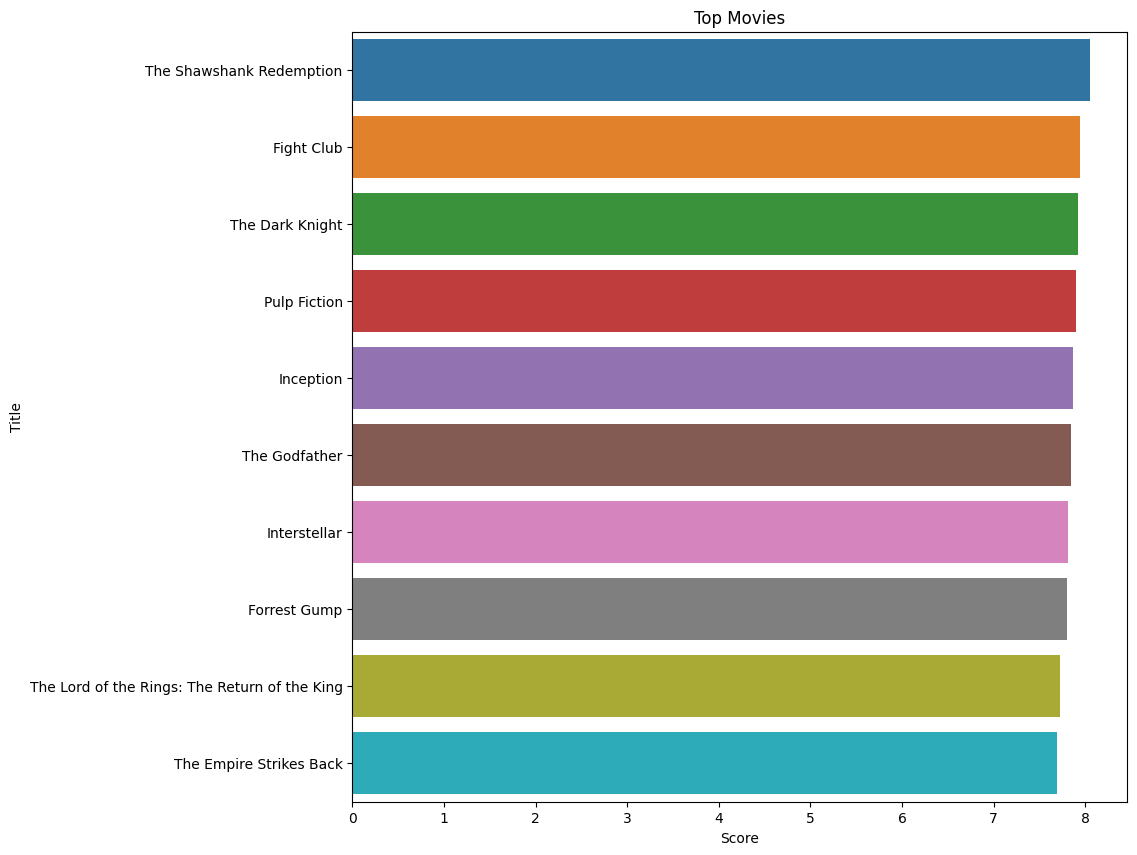

In [191]:
plt.figure(figsize= (10,10))
sns.barplot(x= new_score['score'], y= new_score['title'] )
plt.xlabel("Score")
plt.ylabel("Title")
plt.title("Top Movies")
plt.show()

## B) By Popularity

In [192]:
# Sort by the popularity column
popular_movies = movie_credits.sort_values('popularity', ascending = False).head(10)
popular_movies[['title', 'vote_count','vote_average','popularity']]

,title,vote_count,vote_average,popularity
546,Minions,4571,6.4,875.581305
95,Interstellar,10867,8.1,724.247784
788,Deadpool,10995,7.4,514.569956
94,Guardians of the Galaxy,9742,7.9,481.098624
127,Mad Max: Fury Road,9427,7.2,434.278564
28,Jurassic World,8662,6.5,418.708552
199,Pirates of the Caribbean: The Curse of the Bla...,6985,7.5,271.972889
82,Dawn of the Planet of the Apes,4410,7.3,243.791743
200,The Hunger Games: Mockingjay - Part 1,5584,6.6,206.227151
88,Big Hero 6,6135,7.8,203.734590


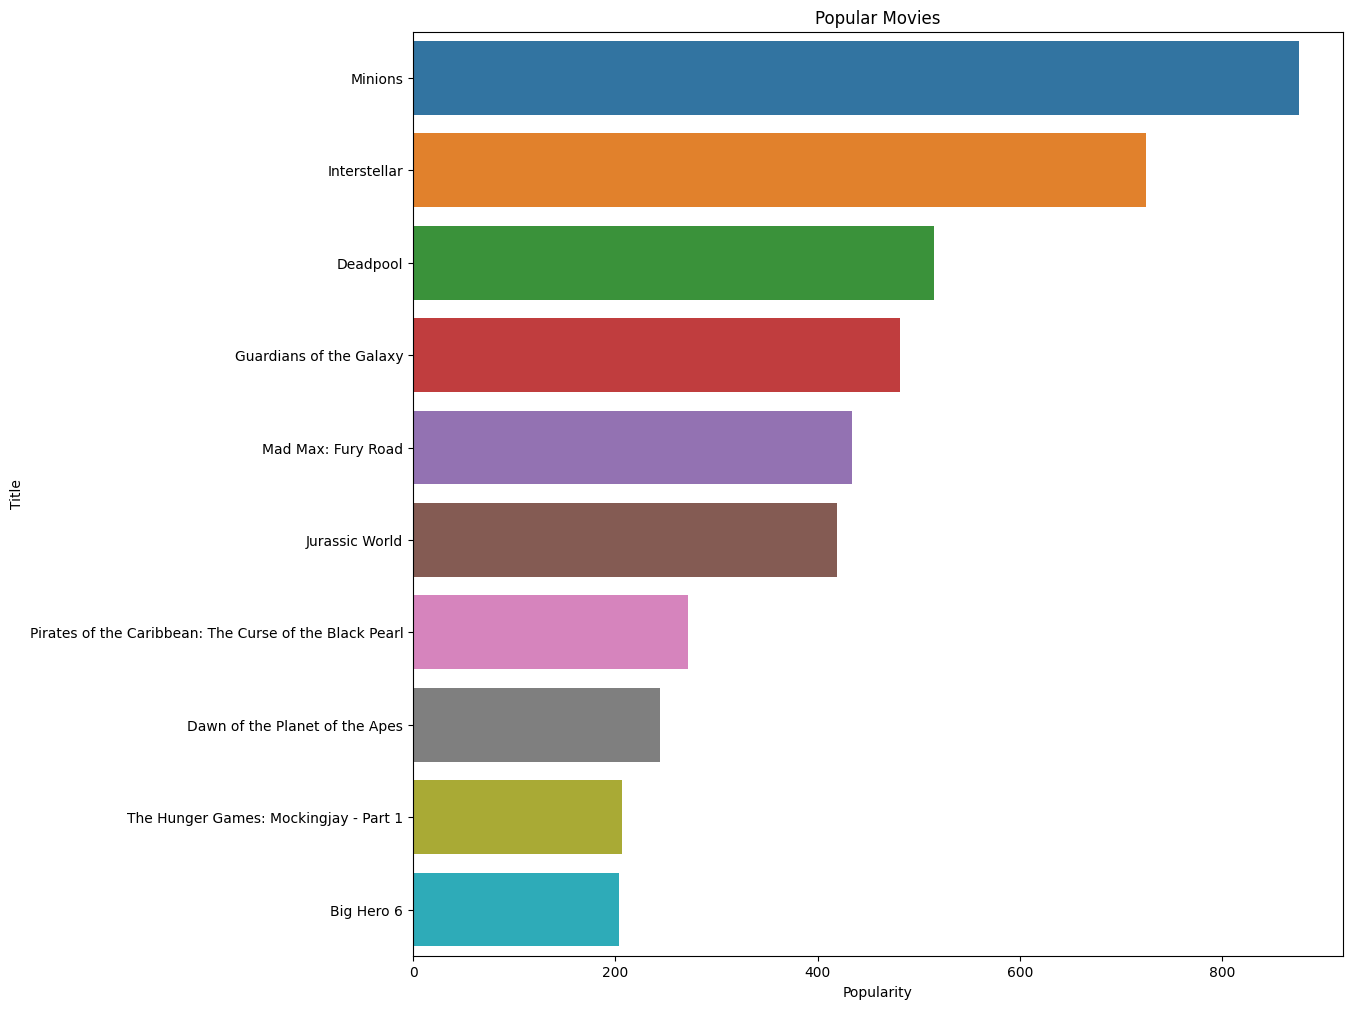

In [193]:
plt.figure(figsize= (12,12))
sns.barplot(x= popular_movies['popularity'], y= popular_movies['title'])
plt.xlabel("Popularity")
plt.ylabel("Title")
plt.title("Popular Movies")
plt.show()

## C) By Weighted Rating

In [194]:
mo_rating = pd.read_csv("C:\\Users\\kabir\\OneDrive\\Desktop\\rating.csv")
m_rating = mo_rating.sample(n=100000, random_state=42)


m_rating.head()

,userId,movieId,rating,timestamp
17679788,122270,8360,3.5,2012-04-22 01:07:04
7106385,49018,32,2.0,2001-09-11 07:50:36
12970708,89527,109374,3.5,2015-01-06 09:26:40
15426752,106704,1060,3.0,2000-01-22 21:27:57
6934678,47791,1732,2.0,2006-01-19 15:48:23


In [195]:
vc = movie_credits['vote_count']
ra = movie_credits['vote_average']
m= 900

vam = movie_credits['vote_average'].mean()
Weighted_Rating =  (vc/ (vc + m) * ra) + (m / (vc + m) * vam)

movie_credits['weighted_ratings'] = Weighted_Rating

sorted_movies = movie_credits.sort_values('weighted_ratings', ascending = False)

top_movies = sorted_movies[['title', 'vote_average', 'genre', 'weighted_ratings']]

top_movies

,title,vote_average,genre,weighted_ratings
1881,The Shawshank Redemption,8.5,"[Drama, Crime]",8.264062
662,Fight Club,8.3,[Drama],8.109152
3337,The Godfather,8.4,"[Drama, Crime]",8.097010
3232,Pulp Fiction,8.3,"[Thriller, Crime]",8.088999
65,The Dark Knight,8.2,"[Drama, Action, Crime, Thriller]",8.054425
...,...,...,...,...
303,Catwoman,4.2,"[Action, Crime]",5.208071
3746,The Boy Next Door,4.1,[Thriller],5.042657
1652,Dragonball Evolution,2.9,"[Action, Adventure, Fantasy, Science Fiction, ...",5.023191
210,Batman & Robin,4.2,"[Action, Crime, Fantasy]",4.942789


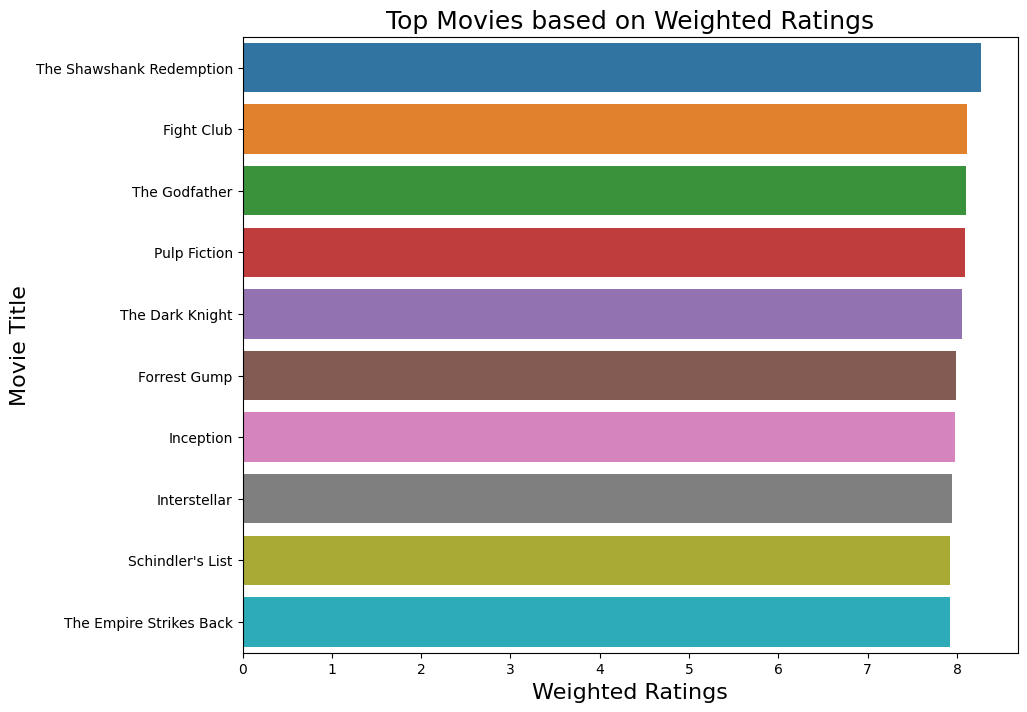

In [196]:
# Step 6: Plot the data
fig, ax = plt.subplots(figsize=(10, 8))
sns.barplot(x=top_movies['weighted_ratings'].head(10), y=top_movies['title'].head(10), ax=ax)
ax.set_xlabel('Weighted Ratings', fontsize=16)
ax.set_ylabel('Movie Title', fontsize=16)
ax.set_title('Top Movies based on Weighted Ratings', fontsize=18)
#plt.savefig(".data/images/Top weighted movies")
plt.show()

## D) By Storyline and Overview

In [197]:
movie_credits

,movie_id,title,budget,homepage,original_language,original_title,overview,popularity,release_date,revenue,...,vote_count,genre,keywords,crew,cast,new_production_countries,new_production_companies,tags,release_year,weighted_ratings
0,19995,Avatar,237000000,http://www.avatarmovie.com/,en,Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin...",150.437577,2009-12-10,2787965087,...,11800,"[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[Stephen E. Rivkin, Rick Carter, Christopher B...","[Jake Sully, Neytiri, Dr. Grace Augustine, Col...","[United States of America, United Kingdom]","[Ingenious Film Partners, Twentieth Century Fo...","[In, the, 22nd, century,, a, paraplegic, Marin...",2009,7.122975
1,285,Pirates of the Caribbean: At World's End,300000000,http://disney.go.com/disneypictures/pirates/,en,Pirates of the Caribbean: At World's End,"[Captain, Barbossa,, long, believed, to, be, d...",139.082615,2007-05-19,961000000,...,4500,"[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","[Dariusz Wolski, Gore Verbinski, Jerry Bruckhe...","[Captain Jack Sparrow, Will Turner, Elizabeth ...",[United States of America],"[Walt Disney Pictures, Jerry Bruckheimer Films...","[Captain, Barbossa,, long, believed, to, be, d...",2007,6.768849
2,206647,Spectre,245000000,http://www.sonypictures.com/movies/spectre/,en,Spectre,"[A, cryptic, message, from, Bond’s, past, send...",107.376788,2015-10-26,880674609,...,4466,"[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...","[Thomas Newman, Sam Mendes, Anna Pinnock, John...","[James Bond, Blofeld, Madeleine, M, Lucia, Q, ...","[United Kingdom, United States of America]","[Columbia Pictures, Danjaq, B24]","[A, cryptic, message, from, Bond’s, past, send...",2015,6.268652
3,49026,The Dark Knight Rises,250000000,http://www.thedarkknightrises.com/,en,The Dark Knight Rises,"[Following, the, death, of, District, Attorney...",112.312950,2012-07-16,1084939099,...,9106,"[Action, Crime, Drama, Thriller]","[dc comics, crime fighter, terrorist, secret i...","[Hans Zimmer, Charles Roven, Christopher Nolan...","[Bruce Wayne / Batman, Alfred Pennyworth, Jame...",[United States of America],"[Legendary Pictures, Warner Bros., DC Entertai...","[Following, the, death, of, District, Attorney...",2012,7.466259
4,49529,John Carter,260000000,http://movies.disney.com/john-carter,en,John Carter,"[John, Carter, is, a, war-weary,, former, mili...",43.926995,2012-03-07,284139100,...,2124,"[Action, Adventure, Science Fiction]","[based on novel, mars, medallion, space travel...","[Andrew Stanton, Andrew Stanton, John Lasseter...","[John Carter, Dejah Thoris, Sola, Tars Tarkas,...",[United States of America],[Walt Disney Pictures],"[John, Carter, is, a, war-weary,, former, mili...",2012,6.103897
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,9367,El Mariachi,220000,NaN,es,El Mariachi,"[El, Mariachi, just, wants, to, play, his, gui...",14.269792,1992-09-04,2040920,...,238,"[Action, Crime, Thriller]","[united states–mexico barrier, legs, arms, pap...","[Robert Rodriguez, Robert Rodriguez, Robert Ro...","[El Mariachi, Bigotón, Mauricio (Moco), Azul, ...","[Mexico, United States of America]",[Columbia Pictures],"[El, Mariachi, just, wants, to, play, his, gui...",1992,6.214926
4799,72766,Newlyweds,9000,NaN,en,Newlyweds,"[A, newlywed, couple's, honeymoon, is, upended...",0.642552,2011-12-26,0,...,5,"[Comedy, Romance]",[],"[Edward Burns, Edward Burns, Edward Burns, Wil...","[Buzzy, Linda, Marsha, Katie, Vanessa]",[],[],"[A, newlywed, couple's, honeymoon, is, upended...",2011,6.111918
4800,231617,"Signed, Sealed, Delivered",0,http://www.hallmarkchannel.com/signedsealeddel...,en,"Signed, Sealed, Delivered","[""Signed,, Sealed,, Delivered"", introduces, a,...",1.444476,2013-10-13,0,...,6,"[Comedy, Drama, Romance, TV Movie]","[date, love at first sight, narration, investi...","[Carla Hetland

In [198]:
movie_credits['overview'].head()

0    [In, the, 22nd, century,, a, paraplegic, Marin...
1    [Captain, Barbossa,, long, believed, to, be, d...
2    [A, cryptic, message, from, Bond’s, past, send...
3    [Following, the, death, of, District, Attorney...
4    [John, Carter, is, a, war-weary,, former, mili...
Name: overview, dtype: object

In [199]:
movie_credits['overview'].isnull().sum()
movie_credits['overview'].fillna('', inplace = True)

In [200]:
movie_credits

,movie_id,title,budget,homepage,original_language,original_title,overview,popularity,release_date,revenue,...,vote_count,genre,keywords,crew,cast,new_production_countries,new_production_companies,tags,release_year,weighted_ratings
0,19995,Avatar,237000000,http://www.avatarmovie.com/,en,Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin...",150.437577,2009-12-10,2787965087,...,11800,"[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[Stephen E. Rivkin, Rick Carter, Christopher B...","[Jake Sully, Neytiri, Dr. Grace Augustine, Col...","[United States of America, United Kingdom]","[Ingenious Film Partners, Twentieth Century Fo...","[In, the, 22nd, century,, a, paraplegic, Marin...",2009,7.122975
1,285,Pirates of the Caribbean: At World's End,300000000,http://disney.go.com/disneypictures/pirates/,en,Pirates of the Caribbean: At World's End,"[Captain, Barbossa,, long, believed, to, be, d...",139.082615,2007-05-19,961000000,...,4500,"[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","[Dariusz Wolski, Gore Verbinski, Jerry Bruckhe...","[Captain Jack Sparrow, Will Turner, Elizabeth ...",[United States of America],"[Walt Disney Pictures, Jerry Bruckheimer Films...","[Captain, Barbossa,, long, believed, to, be, d...",2007,6.768849
2,206647,Spectre,245000000,http://www.sonypictures.com/movies/spectre/,en,Spectre,"[A, cryptic, message, from, Bond’s, past, send...",107.376788,2015-10-26,880674609,...,4466,"[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...","[Thomas Newman, Sam Mendes, Anna Pinnock, John...","[James Bond, Blofeld, Madeleine, M, Lucia, Q, ...","[United Kingdom, United States of America]","[Columbia Pictures, Danjaq, B24]","[A, cryptic, message, from, Bond’s, past, send...",2015,6.268652
3,49026,The Dark Knight Rises,250000000,http://www.thedarkknightrises.com/,en,The Dark Knight Rises,"[Following, the, death, of, District, Attorney...",112.312950,2012-07-16,1084939099,...,9106,"[Action, Crime, Drama, Thriller]","[dc comics, crime fighter, terrorist, secret i...","[Hans Zimmer, Charles Roven, Christopher Nolan...","[Bruce Wayne / Batman, Alfred Pennyworth, Jame...",[United States of America],"[Legendary Pictures, Warner Bros., DC Entertai...","[Following, the, death, of, District, Attorney...",2012,7.466259
4,49529,John Carter,260000000,http://movies.disney.com/john-carter,en,John Carter,"[John, Carter, is, a, war-weary,, former, mili...",43.926995,2012-03-07,284139100,...,2124,"[Action, Adventure, Science Fiction]","[based on novel, mars, medallion, space travel...","[Andrew Stanton, Andrew Stanton, John Lasseter...","[John Carter, Dejah Thoris, Sola, Tars Tarkas,...",[United States of America],[Walt Disney Pictures],"[John, Carter, is, a, war-weary,, former, mili...",2012,6.103897
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,9367,El Mariachi,220000,NaN,es,El Mariachi,"[El, Mariachi, just, wants, to, play, his, gui...",14.269792,1992-09-04,2040920,...,238,"[Action, Crime, Thriller]","[united states–mexico barrier, legs, arms, pap...","[Robert Rodriguez, Robert Rodriguez, Robert Ro...","[El Mariachi, Bigotón, Mauricio (Moco), Azul, ...","[Mexico, United States of America]",[Columbia Pictures],"[El, Mariachi, just, wants, to, play, his, gui...",1992,6.214926
4799,72766,Newlyweds,9000,NaN,en,Newlyweds,"[A, newlywed, couple's, honeymoon, is, upended...",0.642552,2011-12-26,0,...,5,"[Comedy, Romance]",[],"[Edward Burns, Edward Burns, Edward Burns, Wil...","[Buzzy, Linda, Marsha, Katie, Vanessa]",[],[],"[A, newlywed, couple's, honeymoon, is, upended...",2011,6.111918
4800,231617,"Signed, Sealed, Delivered",0,http://www.hallmarkchannel.com/signedsealeddel...,en,"Signed, Sealed, Delivered","[""Signed,, Sealed,, Delivered"", introduces, a,...",1.444476,2013-10-13,0,...,6,"[Comedy, Drama, Romance, TV Movie]","[date, love at first sight, narration, investi...","[Carla Hetland

In [201]:
movie_credits['overview'] = movie_credits['overview'].apply(lambda x: ' '.join(x) if isinstance(x, list) else '')

# movie_credits['soup'] = movie_credits.apply(lambda x: ' '.join([str(x['keywords']), str(x['Directors']), str(x['genre'])]), axis=1)


In [202]:
m_rating.head()

,userId,movieId,rating,timestamp
17679788,122270,8360,3.5,2012-04-22 01:07:04
7106385,49018,32,2.0,2001-09-11 07:50:36
12970708,89527,109374,3.5,2015-01-06 09:26:40
15426752,106704,1060,3.0,2000-01-22 21:27:57
6934678,47791,1732,2.0,2006-01-19 15:48:23


In [203]:
m_rating.shape

(100000, 4)

In [204]:
# Construct the TF-IDF Matrix
tfidfv=TfidfVectorizer(analyzer='word', stop_words='english')
tfidfv_matrix=tfidfv.fit_transform(movie_credits['overview'])
tfidfv_matrix.todense()


matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [205]:
tfidfv_matrix.todense().shape

(4765, 20896)

In [206]:
movie_credits['overview']

0       In the 22nd century, a paraplegic Marine is di...
1       Captain Barbossa, long believed to be dead, ha...
2       A cryptic message from Bond’s past sends him o...
3       Following the death of District Attorney Harve...
4       John Carter is a war-weary, former military ca...
                              ...                        
4798    El Mariachi just wants to play his guitar and ...
4799    A newlywed couple's honeymoon is upended by th...
4800    "Signed, Sealed, Delivered" introduces a dedic...
4801    When ambitious New York attorney Sam is sent t...
4802    Ever since the second grade when he first saw ...
Name: overview, Length: 4765, dtype: object

In [207]:
cosine_sim = cosine_similarity(tfidfv_matrix, tfidfv_matrix)

In [208]:
cosine_sim.shape

(4765, 4765)

In [209]:
indices = pd.Series(data = list(movie_credits.index), index = movie_credits['title'])
indices

title
Avatar                                         0
Pirates of the Caribbean: At World's End       1
Spectre                                        2
The Dark Knight Rises                          3
John Carter                                    4
                                            ... 
El Mariachi                                 4798
Newlyweds                                   4799
Signed, Sealed, Delivered                   4800
Shanghai Calling                            4801
My Date with Drew                           4802
Length: 4765, dtype: int64

In [210]:
def recommended_movies_overview(title, cosine_sim):
    
    # Get the index of the movie that matches the title
    idx = indices[title]
    
    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))
    
    # Sort the movies based on the similarity scores
    sim_scores.sort(key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores=sim_scores[1:11]
    
    # Get the movie indices
    ind=[]
    for (x,y) in sim_scores:
        ind.append(x)
        
    # Return the top 10 most similar movies
    tit=[]
    for x in ind:
        tit.append(movie_credits.iloc[x]['title'])
    return pd.Series(data=tit, index=ind)

recommended_movies_overview('Ratatouille',cosine_sim)

2024     The Hundred-Foot Journey
3266                 Woman on Top
269     The Princess and the Frog
1381                         TMNT
3583           As Above, So Below
142                  Flushed Away
3626                 Bottle Shock
1516                     Repo Men
1718              No Reservations
2214                        Burnt
dtype: object

In [211]:
def update_crew_with_director(data):
    # Create a new column called 'Directors' and assign the values of the 'crew' column to it
    data['Directors'] = data['crew']
    
    # Return the updated DataFrame
    return data
movie_credits = update_crew_with_director(movie_credits)

In [212]:
movie_credits['Director_clean'] = movie_credits['Directors'].apply(lambda x: x[0].strip('[]') if x else None)
# Selecting specific columns
movie_credits[['title', 'Directors', 'keywords', 'genre']]

,title,Directors,keywords,genre
0,Avatar,"[Stephen E. Rivkin, Rick Carter, Christopher B...","[culture clash, future, space war, space colon...","[Action, Adventure, Fantasy, Science Fiction]"
1,Pirates of the Caribbean: At World's End,"[Dariusz Wolski, Gore Verbinski, Jerry Bruckhe...","[ocean, drug abuse, exotic island, east india ...","[Adventure, Fantasy, Action]"
2,Spectre,"[Thomas Newman, Sam Mendes, Anna Pinnock, John...","[spy, based on novel, secret agent, sequel, mi...","[Action, Adventure, Crime]"
3,The Dark Knight Rises,"[Hans Zimmer, Charles Roven, Christopher Nolan...","[dc comics, crime fighter, terrorist, secret i...","[Action, Crime, Drama, Thriller]"
4,John Carter,"[Andrew Stanton, Andrew Stanton, John Lasseter...","[based on novel, mars, medallion, space travel...","[Action, Adventure, Science Fiction]"
...,...,...,...,...
4798,El Mariachi,"[Robert Rodriguez, Robert Rodriguez, Robert Ro...","[united states–mexico barrier, legs, arms, pap...","[Action, Crime, Thriller]"
4799,Newlyweds,"[Edward Burns, Edward Burns, Edward Burns, Wil...",[],"[Comedy, Romance]"
4800,"Signed, Sealed, Delivered","[Carla Hetland, Harvey Kahn, Adam Sliwinski, M...","[date, love at first sight, narration, investi...","[Comedy, Drama, Romance, TV Movie]"
4801,Shanghai Calling,"[Daniel Hsia, Daniel Hsia]",[],[]


In [213]:
# print(movie_credits['soup'].isnull().sum())
# print(movie_credits['soup'].unique())


In [214]:
def create_soup(x):
    keywords = ''.join(x['keywords']).replace(' ', '')
    directors = ''.join(x['Directors']).replace(' ', '')
    genre = ''.join(x['genre']).replace(' ', '')
    return keywords + ' ' + directors + ' ' + genre

movie_credits['soup'] = movie_credits.apply(create_soup, axis=1)
# Initializing CountVectorizer object with English stop words.
cv = CountVectorizer(stop_words='english')

# Applying CountVectorizer to 'soup' column, converting text data into a matrix of token counts.
cv_matrix = cv.fit_transform(movie_credits['soup'])
# Calculating the cosine similarity matrix using the cv_matrix.
cosine_sim2 = cosine_similarity(cv_matrix, cv_matrix)
# Applying the 'recommend_movie' function



recommended_movies_overview('Minions', cosine_sim2)

506                                       Despicable Me 2
614                                         Despicable Me
3400    Alpha and Omega: The Legend of the Saw Tooth Cave
686                                                   Hop
2897                                   Legend of a Rabbit
2463                               The Master of Disguise
2589       VeggieTales: The Pirates Who Don't Do Anything
179                                Penguins of Madagascar
1425                                              Valiant
3049                                            MacGruber
dtype: object

## E) By Genre

In [215]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd

# Create a TF-IDF vectorizer for genre
tfidf_genre = TfidfVectorizer(analyzer='word', stop_words='english')
tfidf_matrix_genre = tfidf_genre.fit_transform(movie_credits['genre'])

# Compute the cosine similarity matrix for genres
cosine_sim_genre = cosine_similarity(tfidf_matrix_genre, tfidf_matrix_genre)

# Build a mapping of movie titles to their corresponding indices
indices = pd.Series(movie_credits.index, index=movie_credits['title']).drop_duplicates()

def recommend_movies_genre(title, cosine_sim, indices):
    # Get the index of the movie that matches the title
    idx = indices.loc[title]
    
    # Get the pairwise similarity scores of all movies with that movie based on genre
    sim_scores = list(enumerate(cosine_sim[idx]))
    
    # Sort the movies based on the similarity scores
    sim_scores.sort(key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]
    
    # Get the movie indices
    indices = [x[0] for x in sim_scores]
    
    # Return the top 10 most similar movies by genre
    recommended_movies = movie_credits.iloc[indices]['title']
    return recommended_movies

# Example usage: Recommend movies based on genre for a given movie title
recommended_movies = recommend_movies_genre("Ratatouille", cosine_sim_genre, indices)
print(recommended_movies)

258                        The Smurfs 2
268                       Stuart Little
390                  Hotel Transylvania
533                       Monster House
742                       The Boxtrolls
452                           Space Jam
154               Rise of the Guardians
1900        The Adventures of Pinocchio
3281                The Secret of Kells
4259    Snow White and the Seven Dwarfs
Name: title, dtype: object


## F) By Collaborative Modeling

In [216]:
movies_cf = pd.read_csv("C:\\Users\\kabir\\OneDrive\\Desktop\\movies_cf.csv")

In [217]:
rating_data = pd.read_csv("C:\\Users\\kabir\\OneDrive\\Desktop\\ratings.csv")

In [218]:
final_rating = rating_data.pivot(index='movieId',columns='userId',values='rating')
final_rating.head()

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
movieId,,,,,,,,,,,,,,,,,,,,,
1,4.0,NaN,NaN,NaN,4.0,NaN,4.5,NaN,NaN,NaN,...,4.0,NaN,4.0,3.0,4.0,2.5,4.0,2.5,3.0,5.0
2,NaN,NaN,NaN,NaN,NaN,4.0,NaN,4.0,NaN,NaN,...,NaN,4.0,NaN,5.0,3.5,NaN,NaN,2.0,NaN,NaN
3,4.0,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN


In [219]:
no_user_voted = rating_data.groupby('movieId')['rating'].agg('count')
no_movies_voted = rating_data.groupby('userId')['rating'].agg('count')


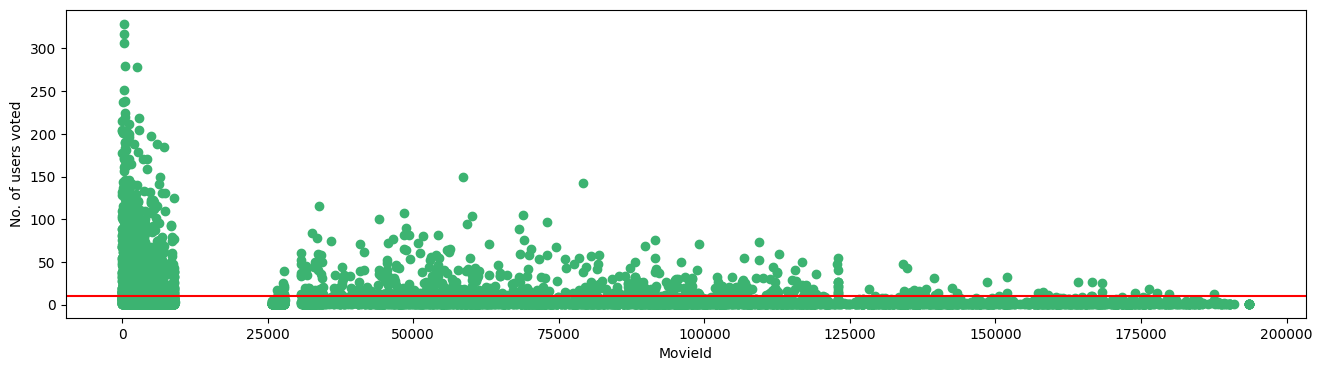

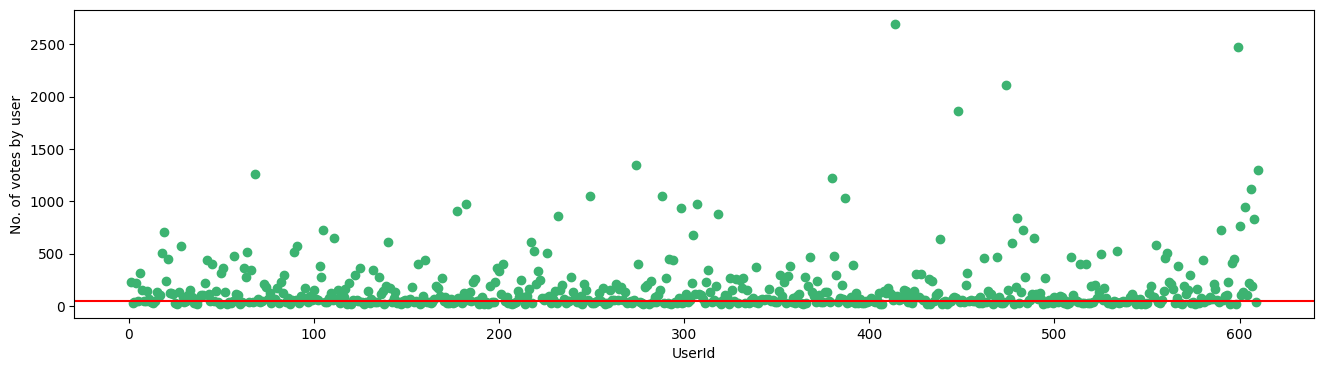

In [220]:
f,ax = plt.subplots(1,1,figsize=(16,4))
# ratings['rating'].plot(kind='hist')
plt.scatter(no_user_voted.index,no_user_voted,color='mediumseagreen')
plt.axhline(y=10,color='r')
plt.xlabel('MovieId')
plt.ylabel('No. of users voted')
plt.show()
#Let’s visualize the number of votes by each user with our threshold of 50.

f,ax = plt.subplots(1,1,figsize=(16,4))
plt.scatter(no_movies_voted.index,no_movies_voted,color='mediumseagreen')
plt.axhline(y=50,color='r')
plt.xlabel('UserId')
plt.ylabel('No. of votes by user')
plt.show()

In [221]:
final_rating = final_rating.loc[no_user_voted[no_user_voted > 10].index,:]
final_rating=final_rating.loc[:,no_movies_voted[no_movies_voted > 50].index]
final_rating

userId,1,4,6,7,10,11,15,16,17,18,...,600,601,602,603,604,605,606,607,608,610
movieId,,,,,,,,,,,,,,,,,,,,,
1,4.0,NaN,NaN,4.5,NaN,NaN,2.5,NaN,4.5,3.5,...,2.5,4.0,NaN,4.0,3.0,4.0,2.5,4.0,2.5,5.0
2,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,3.0,...,4.0,NaN,4.0,NaN,5.0,3.5,NaN,NaN,2.0,NaN
3,4.0,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN
5,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.5,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN
6,4.0,NaN,4.0,NaN,NaN,5.0,NaN,NaN,NaN,4.0,...,NaN,NaN,3.0,4.0,3.0,NaN,NaN,NaN,NaN,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174055,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
176371,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
177765,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,4.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [222]:
final_rating = final_rating.fillna(0)

In [223]:
final_rating

userId,1,4,6,7,10,11,15,16,17,18,...,600,601,602,603,604,605,606,607,608,610
movieId,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,0.0,4.5,0.0,0.0,2.5,0.0,4.5,3.5,...,2.5,4.0,0.0,4.0,3.0,4.0,2.5,4.0,2.5,5.0
2,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,...,4.0,0.0,4.0,0.0,5.0,3.5,0.0,0.0,2.0,0.0
3,4.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
5,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.5,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0
6,4.0,0.0,4.0,0.0,0.0,5.0,0.0,0.0,0.0,4.0,...,0.0,0.0,3.0,4.0,3.0,0.0,0.0,0.0,0.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174055,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
176371,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
177765,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,4.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [224]:
from scipy.sparse import csr_matrix


csr_data = csr_matrix(final_rating.values)
final_rating.reset_index(inplace=True)


In [225]:
from sklearn.neighbors import NearestNeighbors

knn = NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=20, n_jobs=-1)
knn.fit(csr_data)

NearestNeighbors(algorithm='brute', metric='cosine', n_jobs=-1, n_neighbors=20)

In [226]:
def recommend_movies_collab_filter(movie_name):
    n_movies_to_reccomend = 10
    movie_list = movies_cf[movies_cf['title'].str.contains(movie_name)]  
    if len(movie_list):        
        movie_idx = movie_list.iloc[0]['movieId']
        if movie_idx in final_rating['movieId'].values:
            movie_idx = final_rating[final_rating['movieId'] == movie_idx].index[0]
            distances, indices = knn.kneighbors(csr_data[movie_idx], n_neighbors=n_movies_to_reccomend + 1)    
            rec_movie_indices = sorted(list(zip(indices.squeeze().tolist(), distances.squeeze().tolist())), key=lambda x: x[1])[:0:-1]
            recommend_frame = []
            for val in rec_movie_indices:
                movie_idx = final_rating.iloc[val[0]]['movieId']
                idx = movies_cf[movies_cf['movieId'] == movie_idx].index
                recommend_frame.append({'Title': movies_cf.iloc[idx]['title'].values[0], 'Distance': val[1]})
            df = pd.DataFrame(recommend_frame, index=range(1, n_movies_to_reccomend + 1))
            return df
        else:
            return "No ratings found for the movie. Please check your input."
    else:
        return "No movies found. Please check your input."

recommend_movies_collab_filter('Iron Man')


,Title,Distance
1,Up (2009),0.368857
2,Guardians of the Galaxy (2014),0.368758
3,Watchmen (2009),0.368558
4,Star Trek (2009),0.366029
5,Batman Begins (2005),0.362759
6,Avatar (2009),0.310893
7,Iron Man 2 (2010),0.307492
8,WALL·E (2008),0.298138
9,"Dark Knight, The (2008)",0.285835
10,"Avengers, The (2012)",0.285319
